# Task 1  

## General instructions

First, update the following text to have a link to your Homework 2 GitHub repository:

**UPDATE THIS LINK**
https://github.com/kristinaglass/eds220-hwk-3

Add comments for all your code and commit as needed. Err on the side of commenting and commiting too much for now. Points will be deducted for insufficient comments.


## About the data
In this task you will use two datsets:

**First dataset**

The first dataset contains information about [spilling incidents in the state of New York](https://data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk). 
The data portal has plenty of information. 
You will find extra information and metadata for this datset in the 'NYSDEC_SpillIncidents_Overview.pdf' and 'NYSDEC_SpillIncidents_DataDictionary.pdf' documents available at the portal.

You can access this datset via its URL or download it as a csv. 
If you chose to access it via URL, it will take a while to load every time you import it. 

**Second dataset**

The second dataset is a [TIGER shapefile from the United States Census Bureau](https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2022.html#list-tab-790442341). 
For this task you will need to **download the 2022 counties (and equivalent) TIGER shapefile**. 
You can check the [metadata for all the TIGER shapefiles here](https://www.census.gov/programs-surveys/geography/technical-documentation/complete-technical-documentation/tiger-geo-line.html). 



## File management
Make sure all your data files are inside a directory named 'data' inside your repository's directory (working directory).

## Datasets description
Read the metadata for both datsets and write a brief description about each once. Indicate the date sources and date of access.


## FINAL CODE

You will use the next cell at the end of the task. Leave it blank for now. 

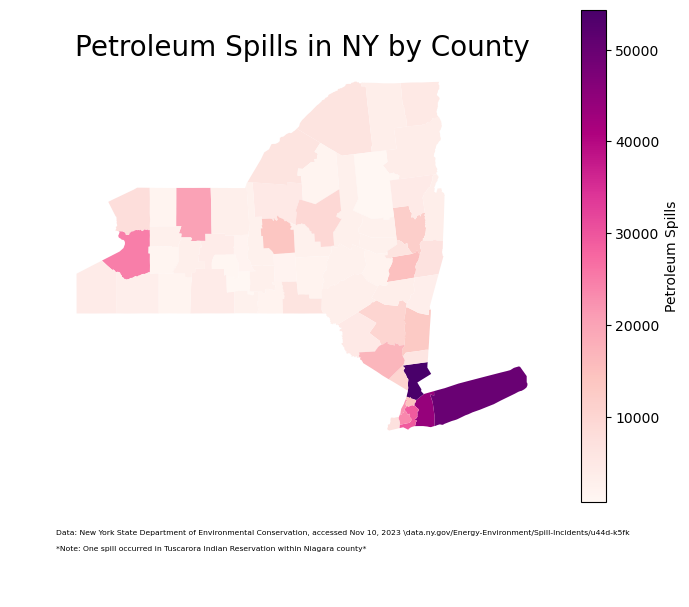

In [1]:
### ===== FINAL CODE =====

### ===== IMPORT DATA AND LIBRARIES =====
# import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# import necessary data
spills = pd.read_csv('https://data.ny.gov/api/views/u44d-k5fk/rows.csv')
counties = gpd.read_file('data/tl_2022_us_county.shp')

### ===== PREPARE SPILLS DATA =====
# make column names lowercase
spills.columns = spills.columns.str.lower()

# remove spaces and add underscore
spills.columns = spills.columns.str.replace(' ', '_')

### ===== DATA SELECTION =====
# convert date columns to datetime objects
spills.spill_date = pd.to_datetime(spills.spill_date)
spills.received_date = pd.to_datetime(spills.received_date)
spills.close_date = pd.to_datetime(spills.close_date)

#subset data to find only incidents of petroleum spills from Jan,1,2023 to Oct,31,2023
petr_23 = spills[ (spills['spill_date']>='2023-01-01') & (spills['spill_date']<='2023-10-31') & (spills['material_family']=='Petroleum')]

### ===== DATA AGGREGATION =====
# create new dataframe containing only spills and county columns
spills_per_county = spills[['county','spill_date']].copy()

# rename "spill_date" column
spills_per_county.rename(columns = {'spill_date':'n_spills'}, inplace = True)
# group by spill count per county
spills_per_county = spills_per_county.groupby('county').count()
# reset index
spills_per_county = spills_per_county.reset_index()

### ===== PREPARE COUNTIES DATA =====
# make column names lowercase
counties.columns = counties.columns.str.lower()

### ===== DATA SELECTION =====
# select new york counties by statefp
ny_counties = counties[counties['statefp']=='36']

### ===== DATA UPDATES =====
# update St Lawrence name at index
spills_per_county.at[70,'county'] = 'St. Lawrence'

### ===== MERGING DATA =====
#rename "county" in spills_per_county to "name"
spills_per_county.rename(columns = {'county':'name'}, inplace = True)

# inner join merge of two datasets through county column
ny_counties = ny_counties.merge(spills_per_county,
                            on='name',
                            how='inner')
#update n_spills_x and n_spills_y with extra spill
ny_counties.at[45,'n_spills'] = 7925

### ===== CREATING MAP =====
#set axis plot
fig, ax = plt.subplots(figsize=(8, 8))
#plot map
ny_counties.plot(ax=ax,
                      column='n_spills',
                       cmap='RdPu', #color gradient
                       legend=True,
                       legend_kwds={"shrink":.8,
                                    'label': "Petroleum Spills" #legend customization
                                    }
                       )
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 10, 2023 \data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(.07, .09), # position
            xycoords='figure fraction', 
            fontsize=5.5, 
            color='black') #annotation customization
ax.annotate("*Note: One spill occurred in Tuscarora Indian Reservation within Niagara county*", 
            xy=(.07, .07), # position
            xycoords='figure fraction', 
            fontsize=5.5, 
            color='black') #annotation customization

ax.set_title('Petroleum Spills in NY by County',  fontsize=20) #set map title
ax.set_axis_off() #remove axis
#show final plot
plt.show()

<!-- write your description in this markdwon cell -->

## Import libraries

In [2]:
# import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Import data 
In the next cell:

- Import the NY spills data as a variable named `spills`. 
- Import the US counties shapefile as a variable named `counties`.


In [3]:
# import necessary data
spills = pd.read_csv('https://data.ny.gov/api/views/u44d-k5fk/rows.csv')
counties = gpd.read_file('data/tl_2022_us_county.shp')

## Prepare spills data

This section refers to the `spills` dataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the unique values in the `material_family` column
5. Check the unique values in the `county` column

You can add any other cells of preliminary data exploration.

In [4]:
# check `spills` head
spills.head()

,Spill Number,Program Facility Name,Street 1,Street 2,Locality,County,ZIP Code,SWIS Code,DEC Region,Spill Date,Received Date,Contributing Factor,Waterbody,Source,Close Date,Material Name,Material Family,Quantity,Units,Recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0
3,204667,POLE 16091,GRACE AVE/BURKE AVE,NaN,BRONX,Bronx,NaN,301,2,08/02/2002,08/02/2002,Equipment Failure,NaN,Commercial/Industrial,10/28/2002,transformer oil,Petroleum,1.0,Gallons,0.0
4,210559,POLE ON,FERDALE LOMIS RD / RT 52,NaN,LIBERTY,Sullivan,NaN,5336,3,01/20/2003,01/20/2003,Traffic Accident,NaN,Commercial/Industrial,01/22/2003,transformer oil,Petroleum,6.0,Gallons,6.0


In [5]:
# make column names lowercase
spills.columns = spills.columns.str.lower()

In [6]:
# check that names were changes
spills.head(1)

,spill number,program facility name,street 1,street 2,locality,county,zip code,swis code,dec region,spill date,received date,contributing factor,waterbody,source,close date,material name,material family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0


In [7]:
# remove spaces and add underscore
spills.columns = spills.columns.str.replace(' ', '_')

In [8]:
# check column names were changed
spills.head(1)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0


In [9]:
# check column data types
print(spills.dtypes)

spill_number               int64
program_facility_name     object
street_1                  object
street_2                  object
locality                  object
county                    object
zip_code                  object
swis_code                  int64
dec_region                 int64
spill_date                object
received_date             object
contributing_factor       object
waterbody                 object
source                    object
close_date                object
material_name             object
material_family           object
quantity                 float64
units                     object
recovered                float64
dtype: object


In [10]:
# show "material_family" unique values
print(spills.material_family.unique())

['Other' 'Petroleum' 'Hazardous Material' 'Oxygenates']


In [11]:
# show'county' unique values
print(spills.county.unique())

['Westchester' 'Queens' 'Bronx' 'Sullivan' 'Cortland' 'New York' 'Ulster'
 'Kings' 'Orange' 'Dutchess' 'Onondaga' 'Saratoga' 'Cayuga' 'Oswego'
 'Warren' 'Niagara' 'Rockland' 'Nassau' 'Jefferson' 'Schenectady' 'Albany'
 'Monroe' 'St Lawrence' 'Richmond' 'Clinton' 'Lewis' 'Essex' 'Chenango'
 'Erie' 'Livingston' 'Wayne' 'Suffolk' 'Orleans' 'Ontario' 'Genesee'
 'Otsego' 'Tompkins' 'Madison' 'Chemung' 'Seneca' 'Oneida' 'Broome'
 'Hamilton' 'Washington' 'Schuyler' 'Franklin' 'Columbia' 'Fulton'
 'Herkimer' 'Schoharie' 'Rensselaer' 'Montgomery' 'Putnam' 'Delaware'
 'New Jersey - Region 2' 'Steuben' 'Tioga' 'Chautauqua' 'Cattaraugus'
 'Wyoming' 'Yates' 'Greene' 'Pennsylvania - Region 9' 'Allegany'
 'New Jersey - Region 3 (N)' 'Cattaraugus Indian Reservation'
 'New Jersey - Region 3 (T)' 'Canada - Region 6' 'Canada - Region 9'
 'Pennsylvania - Region 8' 'Vermont - Region 5 (R)' 'Vermont - Region 4'
 'Connecticut - Region 3 (N)' 'Pennsylvania - Region 3'
 'Tuscarora Indian Reservation' 'Connecti

### Data selection

1. Select data about petroleum spills that took place between January 1st 2023, and October 31st (including both dates), 2023. Store it in a variable named `petr_23`. The data selection should occur in a single line. You may add cells if you needed.

In [12]:
# convert date columns to datetime objects
spills.spill_date = pd.to_datetime(spills.spill_date)
spills.received_date = pd.to_datetime(spills.received_date)
spills.close_date = pd.to_datetime(spills.close_date)

In [13]:
# check new datatypes
print(spills.dtypes)

spill_number                      int64
program_facility_name            object
street_1                         object
street_2                         object
locality                         object
county                           object
zip_code                         object
swis_code                         int64
dec_region                        int64
spill_date               datetime64[ns]
received_date            datetime64[ns]
contributing_factor              object
waterbody                        object
source                           object
close_date               datetime64[ns]
material_name                    object
material_family                  object
quantity                        float64
units                            object
recovered                       float64
dtype: object


In [14]:
# sort "spill_date" to confirm the most recent dataset entries
spills.sort_values(by='spill_date', ascending=False)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
165470,2306693,FOX LANE HIGH SCHOOL,632 SOUTH BEDFORD RD,NaN,BEDFORD,Westchester,NaN,6020,3,2023-11-08,2023-11-08,Human Error,NaN,"Institutional, Educational, Gov., Other",2023-11-09,#2 fuel oil,Petroleum,40.0,Gallons,0.0
298921,2306692,NATIONAL GRID,300 SNYDER'S CORNERS RD,NaN,WYNANTSKILL,Rensselaer,NaN,4214,4,2023-11-08,2023-11-08,Equipment Failure,NaN,Transformer,NaT,transformer oil,Petroleum,0.0,NaN,0.0
211437,2306691,I-90 EASTBOUND MVA,337.5 MILEPOST,NaN,MANCHESTER,Ontario,NaN,3536,8,2023-11-08,2023-11-08,Traffic Accident,NaN,Commercial Vehicle,NaT,diesel,Petroleum,40.0,Gallons,0.0
21818,2306665,7-11 GAS STATION,3009 RT 50,NaN,SARATOGA SPRINGS,Saratoga,NaN,4615,5,2023-11-07,2023-11-07,Other,NaN,Commercial/Industrial,NaT,benzene,Hazardous Material,0.0,Gallons,0.0
87166,2306667,CHAMPLAIN CANAL,21 MAIN STREET,NaN,WHITEHALL,Washington,12887,5852,5,2023-11-07,2023-11-07,Unknown,NaN,Commercial/Industrial,NaT,hydraulic oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
530264,8202132,WEST END AVE,WEST END AVE.,NaN,MANHATTAN,Kings,NaN,2401,2,NaT,1982-04-01,Unknown,NaN,Unknown,1986-10-10,unknown material,Other,0.0,NaN,0.0
532958,8499997,WEYERHAUSER,"WEYERHAUSER,",NaN,PAINTED POST V,Steuben,NaN,5100,8,NaT,1984-02-26,Unknown,ROADSIDE DITCH,Unknown,1986-06-01,waste oil/used oil,Petroleum,100.0,Gallons,0.0
533973,8800079,WHITFORD FARM,SKANEATLAS TRNPK RT8&12,NaN,BROOKFIELD,Madison,NaN,2720,7,NaT,1988-04-04,Unknown,NaN,Unknown,1988-05-02,unknown petroleum,Petroleum,0.0,NaN,0.0
534411,8499974,"WILDER RESIDENCE, ARTHUR","ARTHUR WILDER COTTAGE, 63",NaN,PULTENEY,Steuben,NaN,5100,8,NaT,1984-01-10,Unknown,"GROUNDWATER, KEUKA L",Unknown,1986-06-01,#2 fuel oil,Petroleum,0.0,NaN,0.0


In [15]:
#subset data to find only incidents of petroleum spills from Jan,1,2023 to Oct,31,2023
petr_23 = spills[ (spills['spill_date']>='2023-01-01') & (spills['spill_date']<='2023-10-31') & (spills['material_family']=='Petroleum')]
#check dataframe was updated
petr_23

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
220,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil,Petroleum,0.0,Gallons,0.0
221,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,"used oil (heating, on-site consumption)",Petroleum,0.0,NaN,0.0
222,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,#2 fuel oil (on-site consumption),Petroleum,0.0,NaN,0.0
223,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,Diesel (E-Gen),Petroleum,0.0,NaN,0.0
225,2301892,*** TEST SPILL ***,*** TEST SPILL ***,NaN,*** TEST SPILL ***,Onondaga,00000,3415,7,2023-06-06,2023-06-06,Tank Test Failure,NaN,Unknown,2023-07-12,waste oil/used oil,Petroleum,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541937,2208600,ZHANG RESIDENCE,11 ACORN LANE,NaN,STONY BROOK,Suffolk,NaN,5222,1,2023-01-22,2023-01-22,Equipment Failure,NaN,Private Dwelling,2023-01-31,#2 fuel oil,Petroleum,5.0,Gallons,0.0
541940,2303072,ZHANG RESIDENCE,93 CHERRY LANE,NaN,HICKSVILLE,Nassau,NaN,3024,1,2023-07-14,2023-07-14,Equipment Failure,NaN,Private Dwelling,2023-09-18,#2 fuel oil,Petroleum,0.0,NaN,0.0
542050,2208304,ZIMMERMAN - UST,19 MOUNTAIN AVENUE,NaN,LARCHMONT,Westchester,NaN,6032,3,2023-01-10,2023-01-10,Equipment Failure,NaN,Private Dwelling,NaT,#2 fuel oil,Petroleum,0.0,NaN,0.0
542333,2301301,ZULTOWSKY - UST,514 PELHAM MANOR RD,NaN,PELHAM,Westchester,NaN,6044,3,2023-05-16,2023-05-16,Equipment Failure,NaN,Private Dwelling,2023-07-11,#2 fuel oil,Petroleum,0.0,NaN,0.0


2. Verify that `petr_23` only has data for petroleum spills 

In [16]:
# confim that only petroleum is the only value
print(petr_23.material_family.unique())

['Petroleum']


3. Verify that `petr_23` only has data for 2023. 
HINT: if you converted the `spill_date` column to datetime, you can use `petr_23.spill_date.dt.year.unique()`

In [17]:
# confirm that the only year included is 2023
print(petr_23.spill_date.dt.year.unique())

[2023]


4. Verify that `petr_23` only has data from January to October. 

In [18]:
# confirm that the only months included are from january to october
print(petr_23.spill_date.dt.month.unique())

[ 6  8  9  7  1  2  3 10  5  4]


### Data aggregation

Create new dataframe named `spills_per_county` with the number of petroleum spills per county from January to October 2023 (i.e. use the `petr_23` dataframe).

The resulting `spills_per_county` dataframe must be as follows:

- Index: integer numbers starting from 0
- Column one: county names, column name = `county`
- Column two: number of petroleum spills per county in 2023, column name = `n_spills`

You may add cells if you needed.

In [19]:
# create new dataframe containing only spills and county columns
spills_per_county = spills[['county','spill_date']].copy()
#check new dataframe
spills_per_county

,county,spill_date
0,Westchester,2001-10-10
1,Queens,2004-08-21
2,Queens,2004-08-21
3,Bronx,2002-08-02
4,Sullivan,2003-01-20
...,...,...
542435,New York,1999-07-06
542436,New York,2003-07-28
542437,New York,1993-03-02
542438,Richmond,1990-01-05


In [20]:
# rename "spill_date" column
spills_per_county.rename(columns = {'spill_date':'n_spills'}, inplace = True)
# group by spill count per county
spills_per_county = spills_per_county.groupby('county').count()
# reset index
spills_per_county = spills_per_county.reset_index()
#confirm update in dataframe
spills_per_county

,county,n_spills
0,Albany,14957
1,Allegany,1655
2,Bronx,14661
3,Broome,6424
4,Canada - Region 5,1
...,...,...
82,Washington,3483
83,Wayne,3162
84,Westchester,54363
85,Wyoming,1395


## Prepare counties data

This section refers to the `counties` geodataframe. 
Check the outputs carefully, they will give you context about the next exercises.

### Exploration

In the next cells:

1. Check the geo-dataframe's head
2. Simplify column names as needed
3. Check the data types of the columns
4. Check the geo-dataframe's CRS
5. Plot the geo-dataframe.

You can add any other cells of preliminary data exploration.

In [21]:
# check counties head
counties.head()

,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."


In [22]:
# make column names lowercase
counties.columns = counties.columns.str.lower()

#check columns were updated
counties

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
0,31,039,00835841,31039,Cuming,Cuming County,06,H1,G4020,None,None,None,A,1477644346,10691216,+41.9158651,-096.7885168,"POLYGON ((-96.55515 41.91587, -96.55515 41.914..."
1,53,069,01513275,53069,Wahkiakum,Wahkiakum County,06,H1,G4020,None,None,None,A,680980770,61564427,+46.2946377,-123.4244583,"POLYGON ((-123.72755 46.26449, -123.72755 46.2..."
2,35,011,00933054,35011,De Baca,De Baca County,06,H1,G4020,None,None,None,A,6016818946,29090018,+34.3592729,-104.3686961,"POLYGON ((-104.89337 34.08894, -104.89337 34.0..."
3,31,109,00835876,31109,Lancaster,Lancaster County,06,H1,G4020,None,None,None,A,2169272978,22847034,+40.7835474,-096.6886584,"POLYGON ((-96.68493 40.52330, -96.69219 40.523..."
4,31,129,00835886,31129,Nuckolls,Nuckolls County,06,H1,G4020,None,None,None,A,1489645185,1718484,+40.1764918,-098.0468422,"POLYGON ((-98.27370 40.11840, -98.27374 40.122..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3230,13,123,00351260,13123,Gilmer,Gilmer County,06,H1,G4020,None,None,None,A,1103893380,12276629,+34.6905232,-084.4548113,"POLYGON ((-84.30237 34.57832, -84.30329 34.577..."
3231,27,135,00659513,27135,Roseau,Roseau County,06,H1,G4020,None,None,None,A,4329793477,16913514,+48.7610683,-095.8215042,"POLYGON ((-95.25857 48.88666, -95.25707 48.885..."
3232,28,089,00695768,28089,Madison,Madison County,06,H1,G4020,None,None,None,A,1850178077,71698127,+32.6343703,-090.0341603,"POLYGON ((-90.14883 32.40026, -90.14890 32.400..."
3233,48,227,01383899,48227,Howard,Howard County,06,H1,G4020,None,None,None,A,2333039143,8841781,+32.3034298,-101.4387208,"POLYGON ((-101.18138 32.21252, -101.18138 32.2..."


In [23]:
#check datatypes
print(counties.dtypes)

statefp       object
countyfp      object
countyns      object
geoid         object
name          object
namelsad      object
lsad          object
classfp       object
mtfcc         object
csafp         object
cbsafp        object
metdivfp      object
funcstat      object
aland          int64
awater         int64
intptlat      object
intptlon      object
geometry    geometry
dtype: object


In [24]:
# view dataset crs
print(counties.crs)

epsg:4269


<AxesSubplot:>

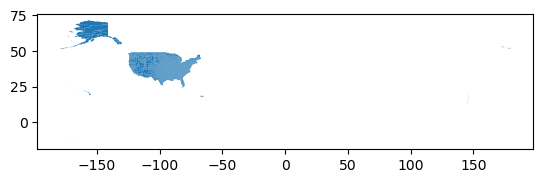

In [25]:
#plot dataframe
counties.plot()

### Data selection

Select all the counties for the state of New York in a new variable `ny_counties` and plot them. HINT: to find which counties correspond to NY, look at the metadata.

In [26]:
# select new york counties by statefp
ny_counties = counties[counties['statefp']=='36']
#check new dataframe only contains NY counties
ny_counties

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry
46,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999..."
165,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911..."
173,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518..."
203,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706..."
210,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2936,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580..."
2963,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067..."
3157,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603..."
3158,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763..."


## Merging

The goal of this section is to create a single dataframe with the number of spills per county and the corresponding geometries for each county.

### Explore data

In the next cells:

1. Print the names of counties in `ny_counties`, without repetition.
2. Print the names of counties in `spills_per_county`, without repetition. (Do you notice anything?)
3. Use the [`numpy` function `setdiff1d()`](https://numpy.org/doc/stable/reference/generated/numpy.setdiff1d.html) to find the county names that are in `spills_per_county`, but not in `ny_counties`. HINT: pay attention to the example in the documentation.
4. Find the county names that are in `ny_counties`, but not in `spills_per_county`.
5. Check the number of spills in 'Tuscarora Indian Reservation'.


In [27]:
# show unique county names in ny_counties
print(ny_counties.name.unique())

['Steuben' 'Saratoga' 'Allegany' 'Oswego' 'Ulster' 'St. Lawrence'
 'Schuyler' 'Essex' 'Suffolk' 'Hamilton' 'Dutchess' 'Otsego' 'Tompkins'
 'Albany' 'Cayuga' 'Greene' 'Herkimer' 'Warren' 'Jefferson' 'Clinton'
 'Nassau' 'Madison' 'Washington' 'Westchester' 'Lewis' 'Ontario'
 'Cortland' 'Richmond' 'Erie' 'Putnam' 'Montgomery' 'Sullivan' 'Orleans'
 'Oneida' 'Cattaraugus' 'Yates' 'Tioga' 'Monroe' 'Schoharie' 'Broome'
 'Rensselaer' 'Seneca' 'Queens' 'Genesee' 'Wayne' 'Niagara' 'Kings'
 'Chemung' 'Wyoming' 'New York' 'Columbia' 'Chautauqua' 'Franklin'
 'Onondaga' 'Chenango' 'Fulton' 'Rockland' 'Livingston' 'Delaware'
 'Orange' 'Schenectady' 'Bronx']


In [28]:
# show unique county names in spills_per_counties
print(spills_per_county.county.unique())

['Albany' 'Allegany' 'Bronx' 'Broome' 'Canada - Region 5'
 'Canada - Region 6' 'Canada - Region 8' 'Canada - Region 9' 'Cattaraugus'
 'Cattaraugus Indian Reservation' 'Cayuga' 'Chautauqua' 'Chemung'
 'Chenango' 'Clinton' 'Columbia' 'Connecticut - Region 1'
 'Connecticut - Region 3 (N)' 'Connecticut - Region 3 (T)'
 'Connecticut - Region 4' 'Cortland' 'Delaware' 'Dutchess' 'Erie' 'Essex'
 'Franklin' 'Fulton' 'Genesee' 'Greene' 'Hamilton' 'Herkimer' 'Jefferson'
 'Kings' 'Lewis' 'Livingston' 'Madison' 'Massachusetts - Region 4'
 'Monroe' 'Montgomery' 'Nassau' 'New Jersey - Region 2'
 'New Jersey - Region 3 (N)' 'New Jersey - Region 3 (T)' 'New York'
 'Niagara' 'Oil Springs Indian Reservation' 'Oneida' 'Onondaga'
 'Onondaga Indian Reservation' 'Ontario' 'Orange' 'Orleans' 'Oswego'
 'Otsego' 'Pennsylvania - Region 3' 'Pennsylvania - Region 7'
 'Pennsylvania - Region 8' 'Pennsylvania - Region 9'
 'Poospatuck Indian Reservation' 'Putnam' 'Queens' 'Rensselaer' 'Richmond'
 'Rockland' 'Saratoga'

In [29]:
# find which county names are not shared between datasets
print(np.setdiff1d(ny_counties.name, spills_per_county.county))

['St. Lawrence']


In [30]:
# number of spills in Tuscarora Indian Reservation
print(spills_per_county[spills_per_county['county']=='Tuscarora Indian Reservation'])

                          county  n_spills
77  Tuscarora Indian Reservation         4


### Data updates

In this section we will update 'St Lawrence' to 'St. Lawrence' in `spills_per_county` data frame.

In the next cells:
1. Check the row in `spills_per_county` that has 'St Lawrence'
2. Run the code and read the explanation in the comments
3. Run the code and read the explanation in the comments
4. Use the `st_lawrence_index` and `at` to update St Lawrence name in `spills_per_county` dataframe
5. Check the update was successfull

In [31]:
# check row with "st lawrence"
print(spills_per_county[spills_per_county['county']=='St Lawrence'])

         county  n_spills
70  St Lawrence      6411


In [32]:
# 2. we can get the index of that single row like this, to access the actual row index...
print(spills_per_county[spills_per_county.county=='St Lawrence'].index)

Int64Index([70], dtype='int64')


In [33]:
# 3. we need to select the first item in that tuple using [0]
st_lawrence_index = spills_per_county[spills_per_county.county=='St Lawrence'].index[0]
# check new dataframe
print(st_lawrence_index)

70


In [34]:
# update St Lawrence name at index
spills_per_county.at[70,'county'] = 'St. Lawrence'

In [35]:
# check index was updated
print(spills_per_county.iloc[70])

county      St. Lawrence
n_spills            6411
Name: 70, dtype: object


### Merge

In the following cells:
1. Use this cell to make any other updates needed for making an inner join of the `spills_per_county` and `ny_counties`. 
2. Over-write `ny_counties` as the  inner join of the `spills_per_county` and `ny_counties` dataframes.

From our previous exploration we know that Tuscarora Indian Reservation will not be in the join. Tuscarora Indian Reservation is located within Niagara county. 

3. Since the Tuscarora Indian Reservation does not appear in the `ny_counties` dataframe, add one spill to Niagara county. We will add a note about this in our final map. Add the cells you need to make this update **and** verify that the dataframe was updated.

In [36]:
#rename "county" in spills_per_county to "name"
spills_per_county.rename(columns = {'county':'name'}, inplace = True)
# check rename was successful
spills_per_county

,name,n_spills
0,Albany,14957
1,Allegany,1655
2,Bronx,14661
3,Broome,6424
4,Canada - Region 5,1
...,...,...
82,Washington,3483
83,Wayne,3162
84,Westchester,54363
85,Wyoming,1395


In [37]:
# inner join merge of two datasets through county column
ny_counties = ny_counties.merge(spills_per_county,
                            on='name',
                            how='inner')
#check merge was successful
ny_counties

,statefp,countyfp,countyns,geoid,name,namelsad,lsad,classfp,mtfcc,csafp,cbsafp,metdivfp,funcstat,aland,awater,intptlat,intptlon,geometry,n_spills
0,36,101,00974148,36101,Steuben,Steuben County,06,H1,G4020,None,None,None,A,3601398422,35039875,+42.2667252,-077.3855253,"POLYGON ((-77.08327 42.00002, -77.09391 41.999...",4170
1,36,091,00974143,36091,Saratoga,Saratoga County,06,H1,G4020,None,None,None,A,2097812305,87488004,+43.1061353,-073.8553872,"POLYGON ((-73.67891 42.91221, -73.67938 42.911...",11886
2,36,003,00974100,36003,Allegany,Allegany County,06,H1,G4020,None,None,None,A,2666225086,12989848,+42.2478532,-078.0261531,"POLYGON ((-78.04342 42.51846, -78.04326 42.518...",1655
3,36,075,00974136,36075,Oswego,Oswego County,06,H1,G4020,None,None,None,A,2464636023,933469962,+43.4614431,-076.2092618,"POLYGON ((-76.02509 43.70702, -76.02004 43.706...",4781
4,36,111,00974153,36111,Ulster,Ulster County,06,H1,G4020,None,None,None,A,2911757764,94596810,+41.9472124,-074.2654582,"POLYGON ((-74.07480 42.09659, -74.06441 42.120...",10259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,36,051,00974124,36051,Livingston,Livingston County,06,H1,G4020,None,None,None,A,1636254770,22005357,+42.7290418,-077.7784630,"POLYGON ((-77.65085 42.58037, -77.65159 42.580...",3020
58,36,025,00974111,36025,Delaware,Delaware County,06,H1,G4020,None,None,None,A,3736306657,64163829,+42.1939865,-074.9667281,"POLYGON ((-74.66969 42.06782, -74.67035 42.067...",3199
59,36,071,00974134,36071,Orange,Orange County,06,H1,G4020,None,None,None,A,2103272841,67953621,+41.4024096,-074.3062522,"POLYGON ((-74.24491 41.60376, -74.24456 41.603...",16790
60,36,093,00974144,36093,Schenectady,Schenectady County,06,H1,G4020,None,None,None,A,530089712,12366944,+42.8175516,-074.0435592,"POLYGON ((-73.89962 42.76425, -73.90678 42.763...",6515


In [40]:
# check Niagra county row and index
print(ny_counties[ny_counties['name']=='Niagara'])
#update n_spills_x and n_spills_y with extra spill
ny_counties.at[45,'n_spills'] = 7925
#check number was updated
print(ny_counties.iloc[45])


   statefp countyfp  countyns  geoid     name        namelsad lsad classfp  \
45      36      063  00974130  36063  Niagara  Niagara County   06      H1   

    mtfcc csafp cbsafp metdivfp funcstat       aland      awater     intptlat  \
45  G4020  None   None     None        A  1352887560  1598842379  +43.2726719   

        intptlon                                           geometry  n_spills  
45  -078.8129431  POLYGON ((-78.49165 43.08396, -78.49179 43.084...      7925  
statefp                                                    36
countyfp                                                  063
countyns                                             00974130
geoid                                                   36063
name                                                  Niagara
namelsad                                       Niagara County
lsad                                                       06
classfp                                                    H1
mtfcc                   

## Map
Create a choropleth map of the number of petroleum spills per county in the state of New York in 2023. 
Your map should have (at least) the following updates:
- a legend indicating the number of spills
- an updated color map
- a title 
- no axis
- an annotation with the data source (New York State Department of Environmental Conservation), date of access HINT: check the graph we did for power plants, 
- an annotation indicating one spill occurred in Tuscarora Indian Reservation within Niagara county

Tuscarora Indian Reservation in Niagara county

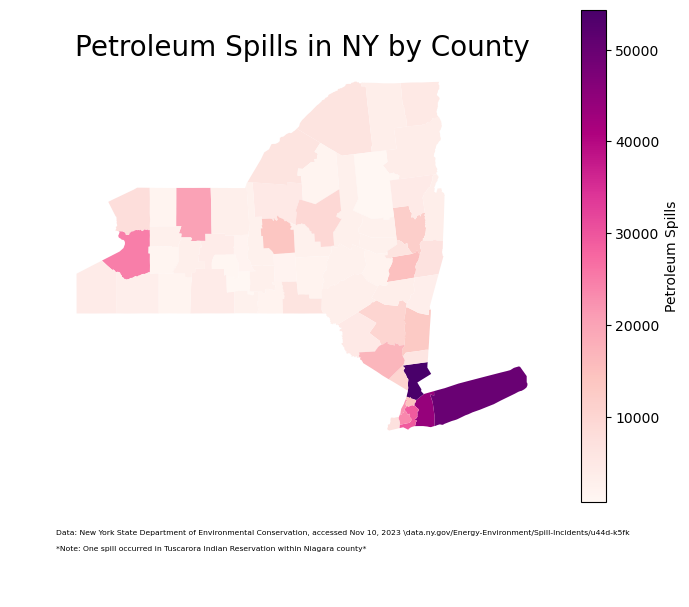

In [39]:
#set axis plot
fig, ax = plt.subplots(figsize=(8, 8))
#plot map
ny_counties.plot(ax=ax,
                      column='n_spills',
                       cmap='RdPu', #color gradient
                       legend=True,
                       legend_kwds={"shrink":.8,
                                    'label': "Petroleum Spills" #legend customization
                                    }
                       )
ax.annotate("Data: New York State Department of Environmental Conservation, accessed Nov 10, 2023 \data.ny.gov/Energy-Environment/Spill-Incidents/u44d-k5fk", 
            xy=(.07, .09), # position
            xycoords='figure fraction', 
            fontsize=5.5, 
            color='black') #annotation customization
ax.annotate("*Note: One spill occurred in Tuscarora Indian Reservation within Niagara county*", 
            xy=(.07, .07), # position
            xycoords='figure fraction', 
            fontsize=5.5, 
            color='black') #annotation customization

ax.set_title('Petroleum Spills in NY by County',  fontsize=20) #set map title
ax.set_axis_off() #remove axis
#show final plot
plt.show()

## Final code

Collect all the relevant code into the first blank cell of the notebook titled "FINAL CODE". This single cell will have the end-to-end workflow: from importing libraries and loading the data, to producing the graph. The *only* ouput of this cell should be the graph you produced in the previous exercise. For each line, add a single comment explaining what the code does.